## participants-oss2019

Cells related to loading and parsing participant data (using Hugo_Pages API)

In [82]:
import sys ; sys.path.append('../../api')
import qgrid
import pandas as pd

In [13]:
df_hugo   = pd.DataFrame(hugo.participants_metadatas())
df_gsheet = hugo.gsheet_data().df_participants_onsite()
df_gsheet['Source'] = 'gsheet'
df_hugo  ['Source'] = 'hugo'

df_hugo  ['Name'  ] = df_hugo['title']
df_hugo             = df_hugo[['Name','status','company','Source']]
#df_hugo.tail()
df_both = pd.merge(df_hugo,df_gsheet, on='Name', how='outer').fillna('')
df_both['Source'] = df_both['Source_x'] +' | ' + df_both['Source_y']
df_both.fillna('*')

df_both = df_both[['Name', 'company','Company', 'Payment Status', 'Source']]
df_both = df_both[df_both['Name']!='']
len(df_both)


140

In [14]:
qgrid.show_grid(df_both)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

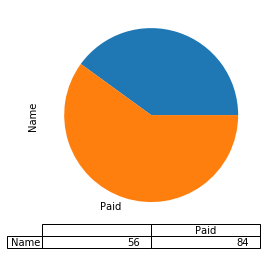

In [33]:
df_both.groupby('Payment Status').count()['Name'].plot.pie(table=True)

In [10]:
df_gsheet = hugo.gsheet_data().df_participants_onsite().set_index('Name')
df_gsheet['source'] = 'gsheet'
df_gsheet

,Accommodation,Company,Days,ID,Location,Nights,Page On website,Payment Status,Sponsor,source
Name,,,,,,,,,,
Sara Davis,Yes,,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__1,Onsite,"[Mon, Tue, Wed, Thu]",Yes,Paid,JeMarketing Services Ltd,gsheet
Lauren Chiesa,Yes,,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__2,Onsite,"[Mon, Tue, Wed, Thu]",Yes,Paid,,gsheet
Colin Domoney,Yes,Createk Design,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__3,Onsite,[],Yes,,,gsheet
Nessim Kisserli,No,,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__4,Onsite,[],Yes,Paid,,gsheet
Artem Vasiuk,Yes,Scalepoint Technologies Denmark A/S,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__5,Onsite,"[Mon, Tue, Wed, Thu]",Yes,Paid,,gsheet
Michael Madsen,Yes,Scalepoint Technologies Denmark A/S,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__6,Onsite,"[Mon, Tue, Wed, Thu]",Yes,Paid,,gsheet
Rafael Jimenez,Yes,Now Training Ltd,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__7,Onsite,"[Mon, Tue, Wed, Thu]",Yes,Paid,,gsheet
Francisco Novo,Yes,Now Training Ltd,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__8,Onsite,"[Mon, Tue, Wed, Thu]",Yes,Paid,,gsheet
Claudio Camerino,Yes,Now Training Ltd,"[Mon, Tue, Wed, Thu, Fri]",OSS_19__9,Onsite,"[Mon, Tue, Wed, Thu]",Yes,Paid,,gsheet


In [9]:
"{0} - {1}".format(len(df_hugo), len(df_gsheet))

'82 - 114'

In [2]:
participants = hugo.participants()
mappings = [
    {  'title': value.get('metadata').get('title'),
       'file' : key } 
        for key,value in participants.items()]

df = pd.DataFrame(mappings).set_index('file')
df.tail()
#qgrid.show_grid(df)

,title
file,
/content/participant/photobox-gs/day-ticket/mario-platt.md,Mario Platt
/content/participant/photobox-gs/day-ticket/stu-hirst.md,Stu Hirst
/content/participant/day-ticket/mario-platt.md,Mario Platt
/content/participant/day-ticket/paul-davies.md,Paul Davies
/content/participant/day-ticket/phil-huggins.md,Phil Huggins


In [31]:
df_columns = pd.DataFrame(api.participants_metadatas()).columns
df_columns

Index(['chapter-leader', 'chapter_leader', 'company', 'email', 'eventbrite_id',
       'facebook', 'featured', 'funded_who', 'image', 'job-title', 'job_title',
       'layout', 'linkedin', 'linkedin-company-beta', 'night_day',
       'night_room', 'night_where', 'notes', 'post-summit', 'pre-summit',
       'pre_summit', 'project-leader', 'project_leader', 'regonline', 'role',
       'sessions', 'slack_id', 'sponsored_by', 'status', 'ticket', 'title',
       'tracks', 'travel-from', 'travel_from', 'twitter', 'type', 'venue',
       'villa', 'website', 'working-sessions'],
      dtype='object')

In [32]:
pd.DataFrame(df_columns)

,0
0,chapter-leader
1,chapter_leader
2,company
3,email
4,eventbrite_id
5,facebook
6,featured
7,funded_who
8,image
9,job-title
